In [125]:
import pandas as pd

In [126]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [127]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [128]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [129]:
print(df_train.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [130]:
print(df_train['HomePlanet'].value_counts(dropna=False))
print(df_train['CryoSleep'].value_counts(dropna=False))


HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: count, dtype: int64
CryoSleep
False    5439
True     3037
NaN       217
Name: count, dtype: int64


HomePlanet vs Transported


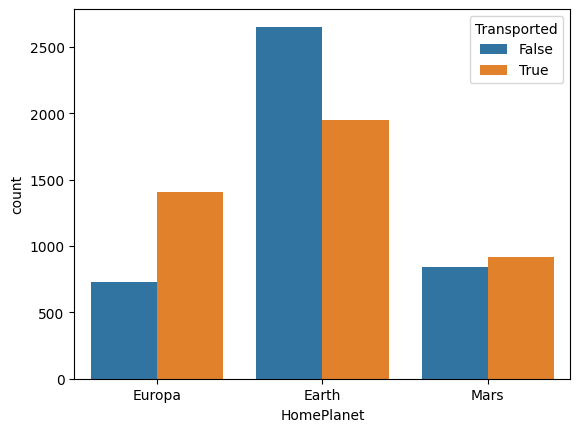

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

print("HomePlanet vs Transported")
sns.countplot(data=df_train, x = 'HomePlanet', hue='Transported')
plt.show()


CryoSleep vs Transported


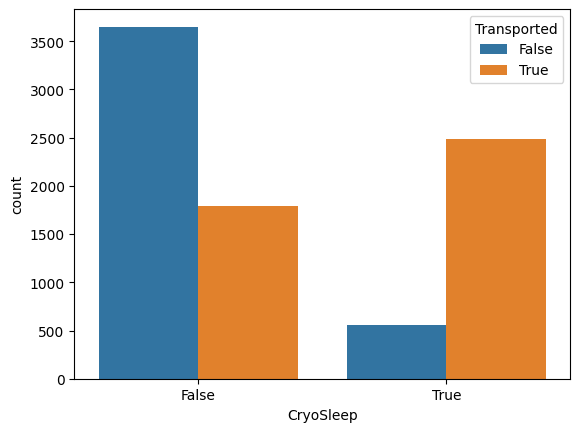

In [132]:
print("CryoSleep vs Transported")
sns.countplot(data=df_train, x = 'CryoSleep', hue='Transported')
plt.show()

Data Preprocessing

In [133]:
home_planet_mode = df_train['HomePlanet'].mode()[0]
df_train['HomePlanet'] = df_train['HomePlanet'].fillna(home_planet_mode)
print("HomePlanet mode: ", home_planet_mode)

cryo_sleep_mode = df_train['CryoSleep'].mode()[0]
df_train['CryoSleep'] = df_train['CryoSleep'].fillna(cryo_sleep_mode)
print("CryoSleep mode: ", cryo_sleep_mode)


HomePlanet mode:  Earth
CryoSleep mode:  False


C:\Users\phong\AppData\Local\Temp\ipykernel_21500\2941867445.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['CryoSleep'] = df_train['CryoSleep'].fillna(cryo_sleep_mode)


In [134]:
age_median = df_train['Age'].median()
df_train['Age'] = df_train['Age'].fillna(age_median)

In [135]:
financial_columns = ['Spa','ShoppingMall','FoodCourt','RoomService','VRDeck']
df_train[financial_columns] = df_train[financial_columns].fillna(0)

In [136]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


In [137]:
destination_mean = df_train['Destination'].mode()[0]
df_train['Destination'] = df_train['Destination'].fillna(destination_mean)

vip_mean = df_train['VIP'].mode()[0]
df_train['VIP'] = df_train['VIP'].fillna(vip_mean)

C:\Users\phong\AppData\Local\Temp\ipykernel_21500\4062496179.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['VIP'] = df_train['VIP'].fillna(vip_mean)


In [138]:
df_train = pd.get_dummies(df_train, columns=['HomePlanet','Destination','VIP'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   bool   
 2   Cabin                      8494 non-null   object 
 3   Age                        8693 non-null   float64
 4   RoomService                8693 non-null   float64
 5   FoodCourt                  8693 non-null   float64
 6   ShoppingMall               8693 non-null   float64
 7   Spa                        8693 non-null   float64
 8   VRDeck                     8693 non-null   float64
 9   Name                       8493 non-null   object 
 10  Transported                8693 non-null   bool   
 11  HomePlanet_Earth           8693 non-null   bool   
 12  HomePlanet_Europa          8693 non-null   bool   
 13  HomePlanet_Mars            8693 non-null   bool 

In [139]:
df_train = df_train.drop(['PassengerId','Cabin','Name'], axis =1 )
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   bool   
 1   Age                        8693 non-null   float64
 2   RoomService                8693 non-null   float64
 3   FoodCourt                  8693 non-null   float64
 4   ShoppingMall               8693 non-null   float64
 5   Spa                        8693 non-null   float64
 6   VRDeck                     8693 non-null   float64
 7   Transported                8693 non-null   bool   
 8   HomePlanet_Earth           8693 non-null   bool   
 9   HomePlanet_Europa          8693 non-null   bool   
 10  HomePlanet_Mars            8693 non-null   bool   
 11  Destination_55 Cancri e    8693 non-null   bool   
 12  Destination_PSO J318.5-22  8693 non-null   bool   
 13  Destination_TRAPPIST-1e    8693 non-null   bool 

In [140]:
import numpy as np
skewed_columns = ['VRDeck','Spa','ShoppingMall','FoodCourt','RoomService']
df_train[skewed_columns] = df_train[skewed_columns].apply(np.log1p)
print(df_train.describe())

               Age  RoomService    FoodCourt  ShoppingMall          Spa  \
count  8693.000000  8693.000000  8693.000000   8693.000000  8693.000000   
mean     28.790291     1.735295     1.906543      1.599415     1.838851   
std      14.341404     2.719285     2.932951      2.567446     2.769368   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%      20.000000     0.000000     0.000000      0.000000     0.000000   
50%      27.000000     0.000000     0.000000      0.000000     0.000000   
75%      37.000000     3.737670     4.127134      3.135494     3.988984   
max      79.000000     9.569971    10.302733     10.064458    10.017218   

            VRDeck  
count  8693.000000  
mean      1.757950  
std       2.746810  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       3.713572  
max      10.091377  


In [141]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['VRDeck','Spa','ShoppingMall','FoodCourt','RoomService','Age']
scaler = StandardScaler() 
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03,8.693000e+03
mean,-2.615595e-17,-1.087107e-16,1.593878e-17,8.582421e-18,-1.430404e-17,-2.125171e-17
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-2.007610e+00,-6.381808e-01,-6.500799e-01,-6.229951e-01,-6.640350e-01,-6.400338e-01
25%,-6.129662e-01,-6.381808e-01,-6.500799e-01,-6.229951e-01,-6.640350e-01,-6.400338e-01
50%,-1.248409e-01,-6.381808e-01,-6.500799e-01,-6.229951e-01,-6.640350e-01,-6.400338e-01
75%,5.724810e-01,7.364030e-01,7.571622e-01,5.983253e-01,7.764431e-01,7.120022e-01
max,3.501233e+00,2.881319e+00,2.862876e+00,3.297257e+00,2.953323e+00,3.034031e+00


In [142]:
X_train = df_train.drop(['Transported'],axis =1)
y_train = df_train['Transported']

print(X_train)

      CryoSleep       Age  RoomService  FoodCourt  ShoppingMall       Spa  \
0         False  0.711945    -0.638181  -0.650080     -0.622995 -0.664035   
1         False -0.334037     1.090491   0.135040      0.646081  1.614565   
2         False  2.036857     0.753511   2.139858     -0.622995  2.518191   
3         False  0.293552    -0.638181   1.790516      1.682500  2.264863   
4         False -0.891895     1.464342   0.803380      1.333879  1.624920   
...         ...       ...          ...        ...           ...       ...   
8688      False  0.851410    -0.638181   2.359900     -0.622995  2.009974   
8689       True -0.752431    -0.638181  -0.650080     -0.622995 -0.664035   
8690      False -0.194573    -0.638181  -0.650080      2.312112 -0.413730   
8691      False  0.223820    -0.638181   1.721915     -0.622995  1.455450   
8692      False  1.060606     1.143341   2.232158     -0.622995 -0.664035   

        VRDeck  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0  

In [143]:
print(y_train)

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2,random_state=42)
X_train_split.shape

(6954, 15)

In [145]:
X_val_split.shape

(1739, 15)

In [146]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train_split,y_train_split)
y_pred_lr = lr.predict(X_val_split)
accuracy_lr = accuracy_score(y_val_split,y_pred_lr)
accuracy_lr

0.7676825761932144

In [147]:
from sklearn.metrics import confusion_matrix, classification_report


In [148]:
print(classification_report(y_val_split,y_pred_lr))
cm = confusion_matrix(y_val_split, y_pred_lr)
print(cm)

              precision    recall  f1-score   support

       False       0.79      0.73      0.76       861
        True       0.75      0.81      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

[[626 235]
 [169 709]]


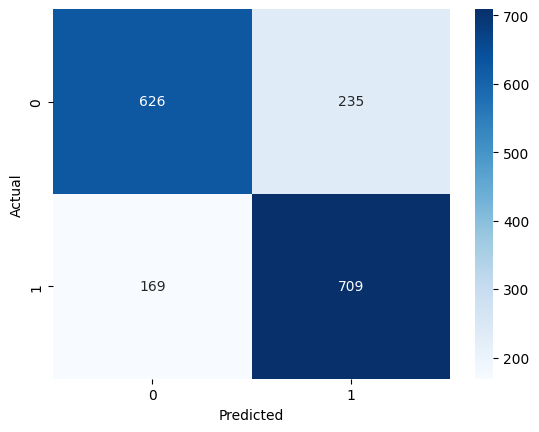

In [149]:
sns.heatmap(cm, annot= True, fmt='d', cmap ='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

rf: 0.7768832662449684


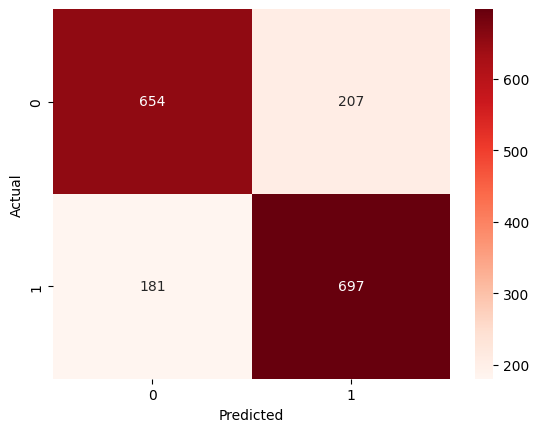

In [150]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state= 42)
rf_model.fit(X_train_split,y_train_split)
y_pred_rf = rf_model.predict(X_val_split)
accuracy_rf = accuracy_score(y_val_split, y_pred_rf)
print(f"rf: {accuracy_rf}")

cm = confusion_matrix(y_val_split,y_pred_rf)
sns.heatmap(cm, annot= True, fmt = 'd', cmap = 'Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [151]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
combined_df = pd.concat([df_train.drop('Transported',axis =1),df_test], ignore_index= True)
cabin_col = combined_df['Cabin'].astype(str)

In [152]:
cabin_col.head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [153]:
cabin_parts = cabin_col.str.split('/', expand=True)

In [154]:
combined_df['Deck'] = cabin_parts[0]
combined_df['Side'] = cabin_parts[2]

In [155]:
combined_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,F,S


In [156]:
combined_df['Age'].fillna(combined_df['Age'].mean(), inplace = True)

spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in spend_cols:
    combined_df[col].fillna(0,inplace=True)
    combined_df[col] = np.log1p(combined_df[col])

C:\Users\phong\AppData\Local\Temp\ipykernel_21500\272024274.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['Age'].fillna(combined_df['Age'].mean(), inplace = True)
C:\Users\phong\AppData\Local\Temp\ipykernel_21500\272024274.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [157]:
combined_df['HomePlanet'].fillna(combined_df['HomePlanet'].mode()[0], inplace=True)
combined_df['CryoSleep'].fillna(combined_df['CryoSleep'].mode()[0], inplace = True)
combined_df['Destination'].fillna(combined_df['Destination'].mode()[0], inplace = True)
combined_df['VIP'].fillna(combined_df['VIP'].mode()[0], inplace = True)
combined_df['Deck'].fillna(combined_df['Deck'].mode()[0], inplace = True)
combined_df['Side'].fillna(combined_df['Side'].mode()[0], inplace = True)


C:\Users\phong\AppData\Local\Temp\ipykernel_21500\1223563717.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['HomePlanet'].fillna(combined_df['HomePlanet'].mode()[0], inplace=True)
C:\Users\phong\AppData\Local\Temp\ipykernel_21500\1223563717.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [158]:
combined_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,4.700480,2.302585,3.258097,6.309918,3.806662,Juanna Vines,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,3.784190,8.182280,0.000000,8.812248,3.912023,Altark Susent,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.000000,7.157735,5.918894,8.110728,5.267858,Solam Susent,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,5.717028,4.262680,5.023881,6.338594,1.098612,Willy Santantines,F,S


In [159]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
combined_df = pd.get_dummies(combined_df, columns = categorical_cols, drop_first=True)
combined_df.drop(['Name','Cabin','PassengerId'],axis = 1, inplace = True)

X_new = combined_df.iloc[:len(df_train)]
x_test_final = combined_df.iloc[len(df_train):]
y_new = df_train['Transported']

In [160]:
X_train_split , X_val_split, y_train_split, y_val_split = train_test_split(X_new,y_new, test_size=0.2, random_state=42)

In [161]:
rf_model_new = RandomForestClassifier(n_estimators=100, random_state= 42)
rf_model_new.fit(X_train_split, y_train_split)
y_pred_rf_new = rf_model_new.predict(X_val_split)
accuracy_rf_new = accuracy_score(y_val_split,y_pred_rf_new)
print(f"rf accuracy new: {accuracy_rf_new}")

rf accuracy new: 0.7797584818861415


In [ ]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators':[100,200],
    'max_depth':[5,8,None],
    'min_samples_split':[2, 5],
    'criterion':[ 'gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator = RandomForestClassifier(random_state=42),
    param_grid= param,
    cv= 5,
    scoring = 'accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_split,y_train_split)
y_pred_best_rf = grid_search.predict(X_val_split)
best_accuracy_rf = accuracy_score(y_val_split, y_pred_best_rf)
print(f"Best rf: {best_accuracy_rf}")

Best rf: 0.7866589994249569


In [169]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 200}


In [170]:
best_rf = grid_search.best_estimator_
importances =best_rf.feature_importances_

feature_names = X_train_split.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance':importances
})

feature_importance_df = feature_importance_df.sort_values(by ='Importance',ascending=False)
feature_importance_df

,Feature,Importance
8,CryoSleep_True,0.163635
4,Spa,0.160081
5,VRDeck,0.125915
1,RoomService,0.124401
2,FoodCourt,0.097114
3,ShoppingMall,0.072592
6,HomePlanet_Europa,0.053232
0,Age,0.047907
17,Deck_G,0.026168
16,Deck_F,0.022487


In [177]:
junk_features = ['Deck_T','Deck_nan','Deck_D','VIP_True','Destination_PSO J318.5-22']
X_train_split_clean = X_train_split.drop(junk_features,axis =1)
X_val_split_clean = X_val_split.drop(junk_features,axis =1)

X_train_split_clean.shape

(6954, 16)

In [178]:
X_val_split_clean.shape

(1739, 16)

In [181]:
best_rf.fit(X_train_split_clean,y_train_split)
clean_preds = best_rf.predict(X_val_split_clean)
accuracy_best_rf_clean = accuracy_score(y_val_split,clean_preds)
print(f"Accuracy rf best clean: {accuracy_best_rf_clean}")

Accuracy rf best clean: 0.7901092581943646


In [192]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder = False, eval_metric='logloss',random_state =42)
xgb_model.fit(X_train_split_clean,y_train_split)
y_pred_xgb = xgb_model.predict(X_val_split_clean)
accuracy_xgb = accuracy_score(y_val_split,y_pred_xgb)
print(f"accuracy xgb: {accuracy_xgb}")


accuracy xgb: 0.7924094307073031


In [191]:
param_grd_xgb = {
    'n_estimators': [100,300],
    'max_depth': [3,5],
    'learning_rate':[0.05,0.1],
    'subsample': [0.7,1.0]
}

grid_search_xgb = GridSearchCV(
    estimator = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', random_state = 42),
    param_grid = param_grd_xgb,
    cv = 5,
    scoring = accuracy_score,
    n_jobs = -1
)
grid_search_xgb.fit(X_train_split_clean,y_train_split)
y_pred_xgb_grid = grid_search_xgb.predict(X_val_split_clean)
accuracy_xgb_grid = accuracy_score(y_val_split,y_pred_xgb_grid)
print(f"accuracy xgb grid: {accuracy_xgb_grid}")

accuracy xgb grid: 0.7866589994249569


c:\Users\phong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [200]:
x_test_final = x_test_final.drop(junk_features,axis =1 )

In [195]:
df_test = pd.read_csv('test.csv')
passenger_id = df_test['PassengerId']

In [203]:
final_pred = xgb_model.predict(x_test_final)
final_preds_bool = final_pred.astype(bool)
submission = pd.DataFrame({
    'PassengerID': passenger_id,
    'Transported': final_preds_bool
})
submission.head()

,PassengerID,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [205]:
submission.to_csv('submission_final.csv',index = False)